In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#Read in the CSV
data = 'owid-covid-data.csv'

covid_data = pd.read_csv(data)

covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
covid_data.keys()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
#Drop rows with no data
Covid_Data_Drop = covid_data[['location','gdp_per_capita', 'hospital_beds_per_thousand', 'life_expectancy', 'total_deaths', 'total_tests_per_thousand', 'population', 'aged_65_older', 'aged_70_older' ]]
Covid_Data_Drop = Covid_Data_Drop.dropna()

In [5]:
Covid_Data_Drop

,location,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,total_deaths,total_tests_per_thousand,population,aged_65_older,aged_70_older
705,Afghanistan,1803.987,0.5,64.83,7405.0,21.413,40099462.0,2.581,1.337
733,Afghanistan,1803.987,0.5,64.83,7585.0,22.328,40099462.0,2.581,1.337
747,Afghanistan,1803.987,0.5,64.83,7641.0,22.695,40099462.0,2.581,1.337
820,Afghanistan,1803.987,0.5,64.83,7698.0,24.648,40099462.0,2.581,1.337
850,Afghanistan,1803.987,0.5,64.83,7715.0,24.975,40099462.0,2.581,1.337
...,...,...,...,...,...,...,...,...,...
207254,Zimbabwe,1899.775,1.7,61.49,5515.0,155.794,15993524.0,2.822,1.882
207258,Zimbabwe,1899.775,1.7,61.49,5521.0,156.347,15993524.0,2.822,1.882
207262,Zimbabwe,1899.775,1.7,61.49,5526.0,156.751,15993524.0,2.822,1.882
207266,Zimbabwe,1899.775,1.7,61.49,5534.0,157.320,15993524.0,2.822,1.882


In [6]:
#Check the number of Unique Locations
Total_Location_Count = Covid_Data_Drop['location'].nunique()
Total_Location_Count

144

Create an overview table that summarises key metrics about each coungtry location, including:
GDP Mean, Hospital Beds Per Thousand, Life Expectancy Mean, Total Deaths, Total Tests Per Thousand Mean

In [7]:
# Location Summary 
Covid_Data_Drop = Covid_Data_Drop.set_index("location")
Location_Grouped = Covid_Data_Drop.groupby(["location"])

In [8]:
# Average GDP per country location
Ave_GDP = Location_Grouped["gdp_per_capita"].mean()
Ave_GDP 

location
Afghanistan             1803.987
Albania                11803.431
Algeria                13913.839
Antigua and Barbuda    21490.943
Argentina              18933.907
                         ...    
Uruguay                20551.409
Vietnam                 6171.884
Yemen                   1479.147
Zambia                  3689.251
Zimbabwe                1899.775
Name: gdp_per_capita, Length: 144, dtype: float64

In [9]:
# Average hospital beds per thousand per country location
Ave_Hospital_Beds = Location_Grouped["hospital_beds_per_thousand"].mean()
Ave_Hospital_Beds 

location
Afghanistan            0.50
Albania                2.89
Algeria                1.90
Antigua and Barbuda    3.80
Argentina              5.00
                       ... 
Uruguay                2.80
Vietnam                2.60
Yemen                  0.70
Zambia                 2.00
Zimbabwe               1.70
Name: hospital_beds_per_thousand, Length: 144, dtype: float64

In [10]:
#Life Expectancy Average per country
Ave_LifeExpectancy = Location_Grouped["life_expectancy"].mean()
Ave_LifeExpectancy 

location
Afghanistan            64.83
Albania                78.57
Algeria                76.88
Antigua and Barbuda    77.02
Argentina              76.67
                       ...  
Uruguay                77.91
Vietnam                75.40
Yemen                  66.12
Zambia                 63.89
Zimbabwe               61.49
Name: life_expectancy, Length: 144, dtype: float64

In [11]:
#Testing Average per Thousand
Ave_Testing = Location_Grouped["total_tests_per_thousand"].mean()
Ave_Testing

location
Afghanistan             23.211800
Albania                198.943211
Algeria                  5.167000
Antigua and Barbuda     79.274333
Argentina              321.606265
                          ...    
Uruguay                600.904013
Vietnam                713.807303
Yemen                   10.930500
Zambia                  84.071359
Zimbabwe                46.575313
Name: total_tests_per_thousand, Length: 144, dtype: float64

In [12]:
#Grab population data
Ave_Population = Location_Grouped["population"].mean()
Ave_Population 

location
Afghanistan            40099462.0
Albania                 2854710.0
Algeria                44177969.0
Antigua and Barbuda       93220.0
Argentina              45276780.0
                          ...    
Uruguay                 3426260.0
Vietnam                97468028.0
Yemen                  32981641.0
Zambia                 19473125.0
Zimbabwe               15993524.0
Name: population, Length: 144, dtype: float64

In [13]:
#Grab total Deaths Per Country location? 
Total_Deaths = Location_Grouped["total_deaths"].max()
Total_Deaths     

location
Afghanistan              7715.0
Albania                  3497.0
Algeria                  6857.0
Antigua and Barbuda        42.0
Argentina              128889.0
                         ...   
Uruguay                  7197.0
Vietnam                 43083.0
Yemen                    2149.0
Zambia                   3990.0
Zimbabwe                 5541.0
Name: total_deaths, Length: 144, dtype: float64

In [14]:
#Grab aged 65 and older
Aged_65_Older = Location_Grouped["aged_65_older"].mean()
Aged_65_Older

location
Afghanistan             2.581
Albania                13.188
Algeria                 6.211
Antigua and Barbuda     6.933
Argentina              11.198
                        ...  
Uruguay                14.655
Vietnam                 7.150
Yemen                   2.922
Zambia                  2.480
Zimbabwe                2.822
Name: aged_65_older, Length: 144, dtype: float64

In [15]:
#Grab aged 70 and older
Aged_70_Older = Location_Grouped["aged_70_older"].mean()
Aged_70_Older

location
Afghanistan             1.337
Albania                 8.643
Algeria                 3.857
Antigua and Barbuda     4.631
Argentina               7.441
                        ...  
Uruguay                10.361
Vietnam                 4.718
Yemen                   1.583
Zambia                  1.542
Zimbabwe                1.882
Name: aged_70_older, Length: 144, dtype: float64

In [16]:
# Created a data frame to hold above results
Location_Summary = pd.DataFrame({'Total Population': Ave_Population,
                               'Country GDP': Ave_GDP,
                               'Hospital Beds': Ave_Hospital_Beds,
                               'Life Expectancy': Ave_LifeExpectancy, 
                               'Testing per Thousand': Ave_Testing,
                               'Total Deaths': Total_Deaths,
                               'Over 65 Years': Aged_65_Older,
                               'Over 70 Years': Aged_70_Older  
                               })
Location_Summary.head()

,Total Population,Country GDP,Hospital Beds,Life Expectancy,Testing per Thousand,Total Deaths,Over 65 Years,Over 70 Years
location,,,,,,,,
Afghanistan,40099462.0,1803.987,0.50,64.83,23.211800,7715.0,2.581,1.337
Albania,2854710.0,11803.431,2.89,78.57,198.943211,3497.0,13.188,8.643
Algeria,44177969.0,13913.839,1.90,76.88,5.167000,6857.0,6.211,3.857
Antigua and Barbuda,93220.0,21490.943,3.80,77.02,79.274333,42.0,6.933,4.631
Argentina,45276780.0,18933.907,5.00,76.67,321.606265,128889.0,11.198,7.441


In [17]:
# Cleaner formatting for the rest of the results by using mapping 
#Location_Summary['Total Population'] = Location_Summary['Total Population'].map("{:,.2f}".format)
#Location_Summary['Country GDP'] = Location_Summary['Country GDP'].map("{:.2f}".format)
#Location_Summary['Testing per Thousand'] = Location_Summary['Testing per Thousand'].map('{:.2f}'.format)
#Location_Summary['Total Deaths'] = School_Summary['Total Deaths'].map('{:.2f}'.format)


In [18]:
# Define a function to create linear regression for a Country and y_axis vs Country GDP
def create_linear_regression(linear_regression_parms_dict):
    
    # Save the parms value from parms dict
    Location_Summary = linear_regression_parms_dict.get("Location_Summary")
    x_values       = linear_regression_parms_dict.get("x_values")
    y_values       = linear_regression_parms_dict.get("y_values")
    ylabel         = linear_regression_parms_dict.get("ylabel")
    unit           = linear_regression_parms_dict.get("unit")
    annotatate_x   = linear_regression_parms_dict.get("annotatate_x")  
    annotatate_y   = linear_regression_parms_dict.get("annotatate_y") 
    
    # Perform a linear regression on y_values vs. x_values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Compare the calcualted Pearson's r to the plots
    plt.scatter( x_values
               , y_values
               , color="blue")

    # Add the line regresssion to plot
    plt.plot(x_values,regress_values,"r-")

    # Annotate the line equation
    plt.annotate(line_eq,(annotatate_x, annotatate_y),fontsize=10,color="red")

    # Set the title and x & y labels
    xlabel = "Country GDP"
    plt.xlabel (f"{xlabel}")
    plt.ylabel (f"{ylabel} {unit}")
    plt.title  (f"{Location_Summary} {ylabel}  vs. {xlabel}")

     # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

The r-value is: 0.45556171859362243


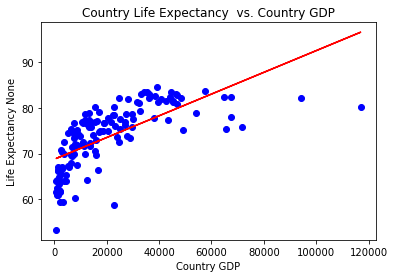

In [19]:
# Calculate the linear regression equation Country - Life Expectancy vs. Country GDP

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Country GDP"]
                               , "y_values"       : Location_Summary["Life Expectancy"]
                               , "ylabel"         : "Life Expectancy"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.113512150274987


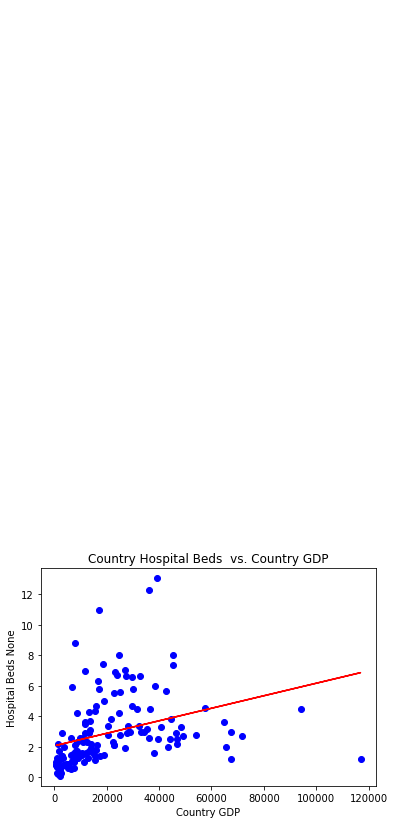

In [20]:
# Calculate the linear regression equation Country - Hospital Beds per Thousand vs. Country GDP

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Country GDP"]
                               , "y_values"       : Location_Summary["Hospital Beds"]
                               , "ylabel"         : "Hospital Beds"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.2320736140816916


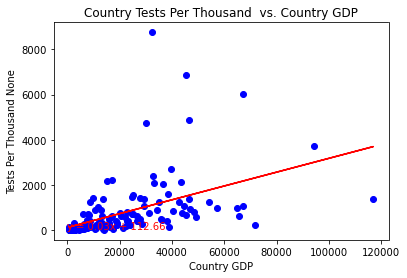

In [21]:
# Calculate the linear regression equation Country - Tests per Thousand vs. Country GDP

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                              , "x_values"       : Location_Summary["Country GDP"]
                               , "y_values"       : Location_Summary["Testing per Thousand"]
                               , "ylabel"         : "Tests Per Thousand"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.010014935570917195


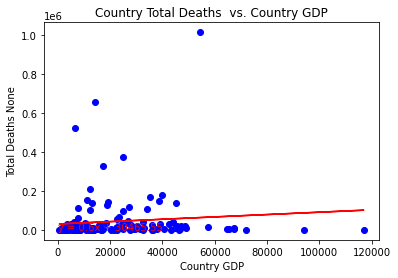

In [22]:
# Calculate the linear regression equation Country - Total Deaths vs. Country GDP

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Country GDP"]
                               , "y_values"       : Location_Summary["Total Deaths"]
                               , "ylabel"         : "Total Deaths"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

In [23]:
# Define a function to create linear regression for a Country and y_axis vs Total Deaths
def create_linear_regression(linear_regression_parms_dict):
    
    # Save the parms value from parms dict
    Location_Summary = linear_regression_parms_dict.get("Location_Summary")
    x_values       = linear_regression_parms_dict.get("x_values")
    y_values       = linear_regression_parms_dict.get("y_values")
    ylabel         = linear_regression_parms_dict.get("ylabel")
    unit           = linear_regression_parms_dict.get("unit")
    annotatate_x   = linear_regression_parms_dict.get("annotatate_x")  
    annotatate_y   = linear_regression_parms_dict.get("annotatate_y") 
    
    # Perform a linear regression on y_values vs. x_values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Compare the calcualted Pearson's r to the plots
    plt.scatter( x_values
               , y_values
               , color="blue")

    # Add the line regresssion to plot
    plt.plot(x_values,regress_values,"r-")

    # Annotate the line equation
    plt.annotate(line_eq,(annotatate_x, annotatate_y),fontsize=10,color="red")

    # Set the title and x & y labels
    xlabel = "Total Deaths"
    plt.xlabel (f"{xlabel}")
    plt.ylabel (f"{ylabel} {unit}")
    plt.title  (f"{Location_Summary} {ylabel}  vs. {xlabel}")

     # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

The r-value is: 0.019629350043058696


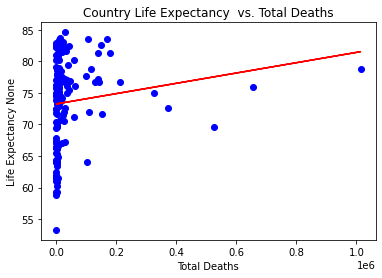

In [24]:
# Calculate the linear regression equation Country - Total Deaths vs. Life Expectancy

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Total Deaths"]
                               , "y_values"       : Location_Summary["Life Expectancy"]
                               , "ylabel"         : "Life Expectancy"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.022101840601024006


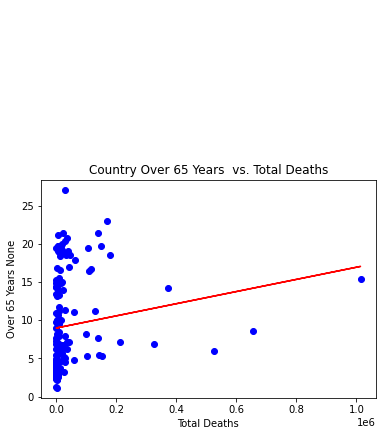

In [25]:
# Calculate the linear regression equation Country - Total Deaths vs. Over 65 Years of Age

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Total Deaths"]
                               , "y_values"       : Location_Summary["Over 65 Years"]
                               , "ylabel"         : "Over 65 Years"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.01987527008553912


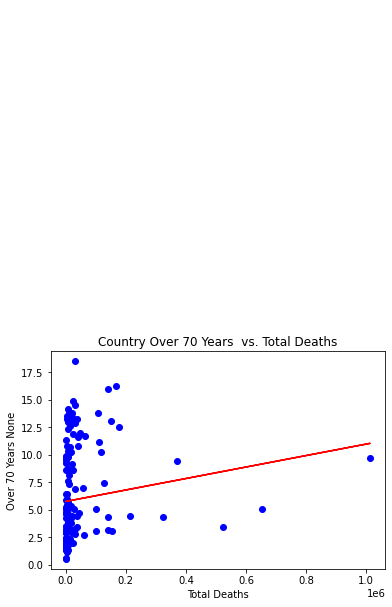

In [26]:
# Calculate the linear regression equation Country - Total Deaths vs. Life Expectancy

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Total Deaths"]
                               , "y_values"       : Location_Summary["Over 70 Years"]
                               , "ylabel"         : "Over 70 Years"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )